## Use the S1.txt data file and plot the datapoints. Split the dataset into train and test set. Implement KNN algorithm on your own and classify the datapoints and then use sklearn's KNN to compare. 

**Import the data**



In [295]:
from google.colab import files
uploaded = files.upload()

Saving S1.txt to S1 (7).txt
Saving S1-labels.pa to S1-labels (2).pa


In [297]:
import pandas as pd

In [296]:
data_S1 = pd.read_csv('S1.txt', delimiter=r"\s+",header=None,names=[ 'A', 'B'])
data_S1.head()
data_S1.shape

(5000, 2)

In [298]:
data_pa= pd.read_fwf('S1-labels.pa',header=None,names=['C'],)
data_pa.head(100)
data_pa.shape
data_pa = data_pa.iloc[5:]
data_pa.head()

,C
5,1
6,1
7,1
8,1
9,1


**Split into text and train**

In [299]:
#Separating the dependent and independent data variables into two data frames.
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(data_S1, data_pa, test_size=.30, random_state=0)

**Plot the data point**


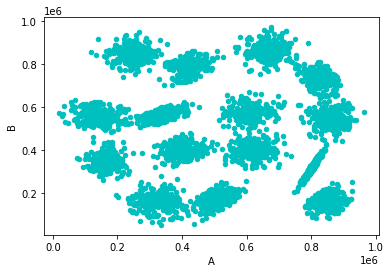

In [294]:
import matplotlib.pyplot as plt 
#max of clusters in the target
data_S1.plot.scatter(x='A',y='B', c=max(data_pa),colormap='viridis')
plt.show()

**Own implementation of KNN**

In [300]:
#Importing the required modules
import numpy as np
from scipy.stats import mode
 
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 
#Function to calculate KNN
def predict(X_train, Y_train , X_test, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in X_test: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(X_train)): 
            distances = eucledian(np.array(X_train[j,:]) , item) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = Y_train[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [301]:
Y_pred = predict(X_train.values, Y_train.values, X_test.values,15)

**Check accuracy**

In [302]:
#Checking the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.99

**KNN from the libraries and on range of K**

In [303]:
import warnings

from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings(action='ignore')
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, Y_train)
  
    training_score = clf.score(X_train, Y_train)
    test_score = clf.score(X_test, Y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9942857142857143, 0.982]
3 : [0.9928571428571429, 0.9893333333333333]
4 : [0.9914285714285714, 0.9893333333333333]
5 : [0.9917142857142857, 0.9893333333333333]
6 : [0.9917142857142857, 0.9893333333333333]
7 : [0.9917142857142857, 0.9893333333333333]
8 : [0.9914285714285714, 0.9893333333333333]
9 : [0.9917142857142857, 0.9893333333333333]
10 : [0.9914285714285714, 0.9893333333333333]
11 : [0.9914285714285714, 0.9893333333333333]
12 : [0.9914285714285714, 0.9893333333333333]
13 : [0.9914285714285714, 0.99]
14 : [0.9914285714285714, 0.9893333333333333]
15 : [0.9914285714285714, 0.99]
16 : [0.9917142857142857, 0.99]
17 : [0.9914285714285714, 0.99]
18 : [0.9914285714285714, 0.9906666666666667]
19 : [0.9914285714285714, 0.9906666666666667]
20 : [0.9914285714285714, 0.9906666666666667]


**Observations** 

Both the accuracies are same with K =15, the time taken to execute the own implementation is more than using library function.



## Use S2.txt data file and plot the datapoints. Figure out the optimal clusters that can be formed and make clusters. Plot the datapoints and centroid.(Use both your own implementation and Sklearn's).

**Load the data**

In [254]:
from google.colab import files
uploaded = files.upload()

Saving S2.txt to S2 (4).txt


In [304]:
data_S2 = pd.read_csv('S2.txt', delimiter=r"\s+",header=None,names=[ 'A', 'B'])


**Plot the data points**

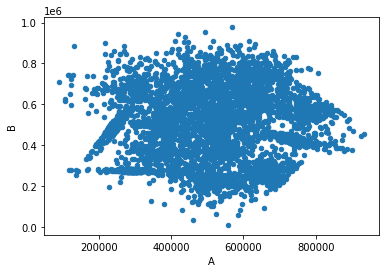

In [305]:
import matplotlib.pyplot as plt 
data_S2.plot.scatter(x='A',y='B')
plt.show()

**Elbow and optimal clusters point**

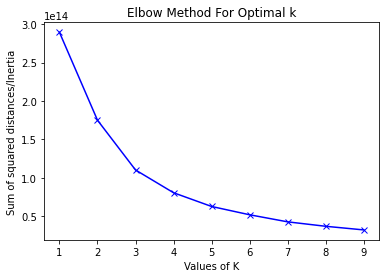

In [306]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
 kmeans.fit(data_S2)
 y_kmeans = kmeans.predict(data_S2)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow is at 3 here . So taking K=3

**Own implementation of Kmeans**

In [307]:
import numpy as np
from scipy.spatial.distance import cdist 
 
#Function to implement steps given in previous section
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points,centroids


**Plot the clusters**

Using K =3 

[0 0 0 ... 0 0 0]


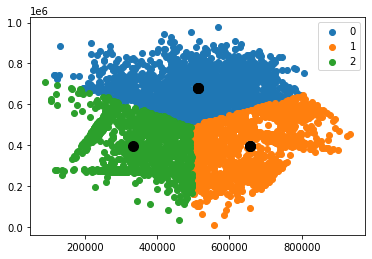

In [308]:
label,centroids = kmeans(data_S2.values,3,10)

print(label)
u_labels = np.unique(label)
for i in u_labels:
    
    plt.scatter(data_S2.values[label == i , 0] , data_S2.values[label == i , 1] , label = i)
    plt.scatter(centroids[:, 0],centroids[:, 1],s=100,c='black')

plt.legend()
plt.show()


**Library implementation of the Kmeans and plot**


**Plotting data points and centroids**

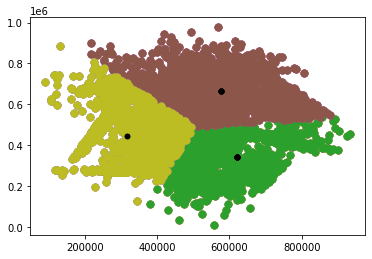

In [309]:
data_S2_K = pd.read_csv('S2.txt', delimiter=r"\s+",header=None,names=[ 'A', 'B'])

kmeans = KMeans(n_clusters=3, random_state= 42)
data_S2_K= data_S2_K.values  
y_predict = kmeans.fit_predict(data_S2_K) 
predictors=[0,1,2]
for i in predictors:
   for j in colors:
      plt.scatter(data_S2_K[y_predict == i, 0], data_S2_K[y_predict == i, 1], s = 50, label = i) #for first cluster  
      plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroid',marker='.')   



The Quality of clustering is imporved with the sklearn kmeans , it utilizes kmeans++ by default. The quality of clustering with normal Kmeans algorithm is poor. sklearn kmeans has a smart way to speed up convergence.